In [9]:
#import libraries
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pandas as pd


In [10]:


# Load your dataset
fly = pd.read_excel("/content/drive/MyDrive/ML project files/flight delay.xlxs.xlsx")

In [11]:

# Clean column names by stripping whitespace
fly.columns = fly.columns.str.strip()

# Now select the columns after cleaning
fly_data = fly[['DayOfWeek', 'Time', 'Length','Delay']]
print(fly_data)

      DayOfWeek  Time  Length  Delay
0             3    15     205      1
1             3    15     222      1
2             3    20     165      1
3             3    20     195      1
4             3    30     202      0
...         ...   ...     ...    ...
1916          3   435     163      0
1917          3   435     100      0
1918          3   435      97      0
1919          3   435     269      0
1920          3   435     190      0

[1921 rows x 4 columns]


In [12]:
# Select independent (X) and dependent (y) variables
X = fly[['DayOfWeek', 'Time', 'Length']]
y = fly['Delay']


In [14]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train, X_test, y_train, y_test)

      DayOfWeek  Time  Length
426           3   360     135
141           3   345     107
1157          3   395     135
965           3   385     104
1829          3   430     318
...         ...   ...     ...
1130          3   390     119
1294          3   405      65
860           3   380      88
1459          3   415      69
1126          3   390      58

[1536 rows x 3 columns]       DayOfWeek  Time  Length
998           3   390     205
1622          3   420      50
611           3   365     119
514           3   360      95
413           3   360      82
...         ...   ...     ...
1679          3   420      76
433           3   360     404
570           3   365     145
741           3   375      76
590           3   365     139

[385 rows x 3 columns] 426     0
141     0
1157    0
965     1
1829    0
       ..
1130    0
1294    0
860     0
1459    0
1126    0
Name: Delay, Length: 1536, dtype: int64 998     0
1622    0
611     0
514     0
413     0
       ..
1679    1
433     0
5

In [15]:
# Create and train the model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [16]:
# Print accuracy
print("Model Accuracy:", model.score(X_test, y_test))

Model Accuracy: 0.787012987012987


In [22]:
# ---- Prediction Part ----
print("\n--- Flight Delay Prediction ---")
# User input
day = int(input("Enter Day of Week (1-7): "))
time = int(input("Enter Time (HHMM): "))
length = int(input("Enter Flight Length (minutes): "))
# Prepare input for prediction
user_input = [[day, time, length]]
# Predict
prediction = model.predict(user_input)

# Output result
if prediction[0] == 1:
    print("Result: The flight WILL BE delayed ")
else:
    print("Result: The flight will NOT be delayed ")


--- Flight Delay Prediction ---
Enter Day of Week (1-7): 6
Enter Time (HHMM): 2300
Enter Flight Length (minutes): 200
Result: The flight will NOT be delayed 😊


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


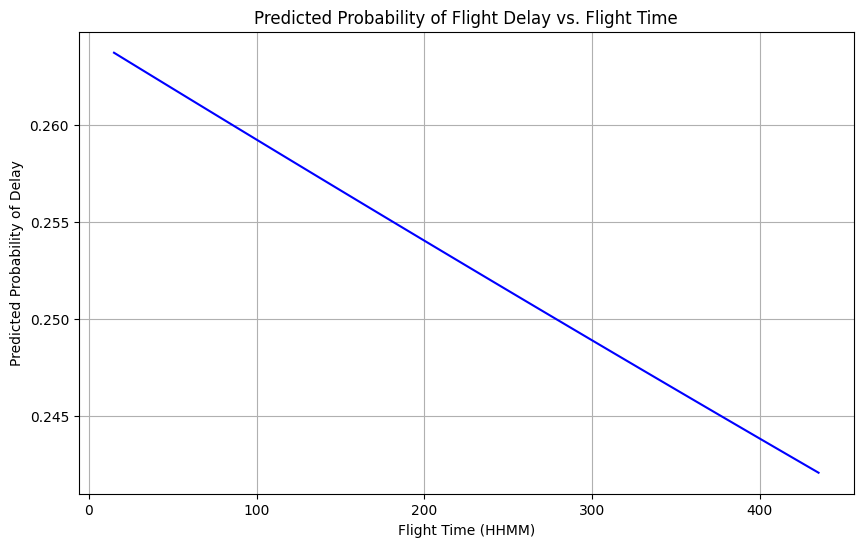

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Get mean values for other features to keep them constant
mean_dayofweek = X_train['DayOfWeek'].mean()
mean_length = X_train['Length'].mean()

# Create a range of 'Time' values for prediction
time_range = np.linspace(X_train['Time'].min(), X_train['Time'].max(), 100)

# Create a DataFrame for prediction with constant DayOfWeek and Length
predict_df = pd.DataFrame({
    'DayOfWeek': [mean_dayofweek] * len(time_range),
    'Time': time_range,
    'Length': [mean_length] * len(time_range)
})

# Predict probabilities
# model.predict_proba returns probabilities for both classes (0 and 1)
# We are interested in the probability of delay (class 1)
probabilities = model.predict_proba(predict_df)[:, 1]

# Plotting the linear line graph
plt.figure(figsize=(10, 6))
plt.plot(time_range, probabilities, color='blue')
plt.title('Predicted Probability of Flight Delay vs. Flight Time')
plt.xlabel('Flight Time (HHMM)')
plt.ylabel('Predicted Probability of Delay')
plt.grid(True)
plt.show()